### What is Lasso Regression?

Lasso Regression, short for Least Absolute Shrinkage and Selection Operator Regression, is a linear regression technique that adds a regularization term to the ordinary least squares (OLS) objective function. Similar to Ridge Regression, Lasso Regression also aims to prevent overfitting by penalizing the magnitude of the coefficients.

The key difference between Ridge Regression and Lasso Regression lies in the type of regularization applied:

1. **Lasso Regularization:**
   - Lasso regularization adds the absolute sum of the coefficients (L1 penalty) to the OLS objective function.
   - The regularization term is proportional to the sum of the absolute values of the coefficients: `alpha * sum(abs(coef_))`, where `alpha` is the regularization parameter and `coef_` are the coefficients.
   - The L1 penalty encourages sparsity in the coefficient vector, meaning it tends to force some coefficients to be exactly zero.
   - As a result, Lasso Regression not only helps in reducing overfitting but also performs feature selection by effectively setting some coefficients to zero, thus ignoring the corresponding features.

2. **Objective Function:**
   - The objective function of Lasso Regression can be expressed as the sum of two terms: the mean squared error term (same as OLS) and the L1 penalty term.
   - Minimizing this objective function leads to a trade-off between fitting the training data and keeping the magnitude of the coefficients small.

In summary, Lasso Regression is a linear regression technique that applies L1 regularization to the coefficient values. It is particularly useful when dealing with high-dimensional data with many features, as it can effectively perform feature selection by setting some coefficients to zero, thereby simplifying the model and improving interpretability.

![L1 regularization formula](l1.png)

The L1 regularization term encourages sparsity in the coefficients by penalizing large coefficients, effectively pushing some of them to zero during model training. This leads to a simpler model and potentially improves interpretability, as irrelevant features may be eliminated from the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

import warnings 
warnings.filterwarnings('ignore')

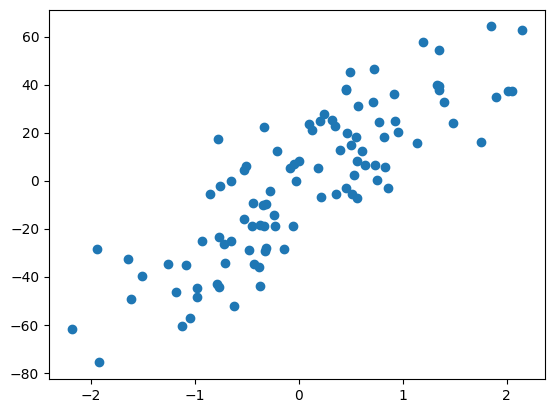

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[28.87537492]
-1.7650458619227183


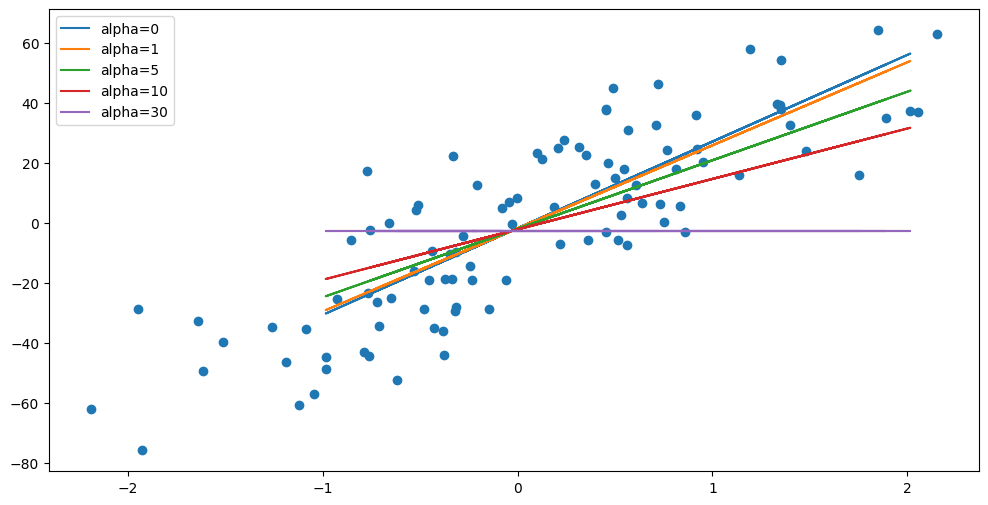

In [4]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

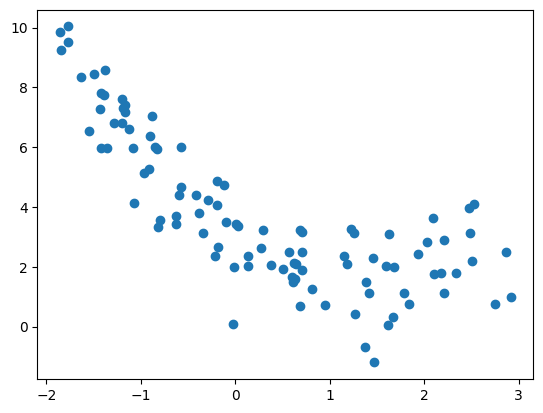

In [5]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

This code generates synthetic data for a quadratic relationship between two variables, \(x_1\) and \(x_2\), along with some random noise. Here's a breakdown of each line:

1. `m = 100`: Assigns the value 100 to the variable `m`, which represents the number of data points.

2. `x1 = 5 * np.random.rand(m, 1) - 2`: Generates `m` random values for the variable \(x_1\) using NumPy's `rand` function. These values are between 0 and 1. Then, it scales them by 5 and shifts the range to be between -2 and 3. This results in an array `x1` of shape `(m, 1)`.

3. `x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)`: Computes the corresponding values for the variable \(x_2\) based on a quadratic relationship with \(x_1\), plus some random noise.
   - `0.7 * x1 ** 2 - 2 * x1 + 3`: This part defines the quadratic relationship. It squares each value in `x1`, multiplies by 0.7, subtracts 2 times the value in `x1`, and adds 3. This equation represents a simple quadratic function.
   - `+ np.random.randn(m, 1)`: Adds random noise sampled from a normal distribution with mean 0 and standard deviation 1. This introduces randomness and variability into the relationship between \(x_1\) and \(x_2\).
   - The result is an array `x2` of shape `(m, 1)`, representing the corresponding \(x_2\) values for each \(x_1\) value.

In summary, this code generates synthetic data for a quadratic relationship between \(x_1\) and \(x_2\) with some added randomness in the form of noise. It's often used for testing and experimenting with regression models or other machine learning algorithms.

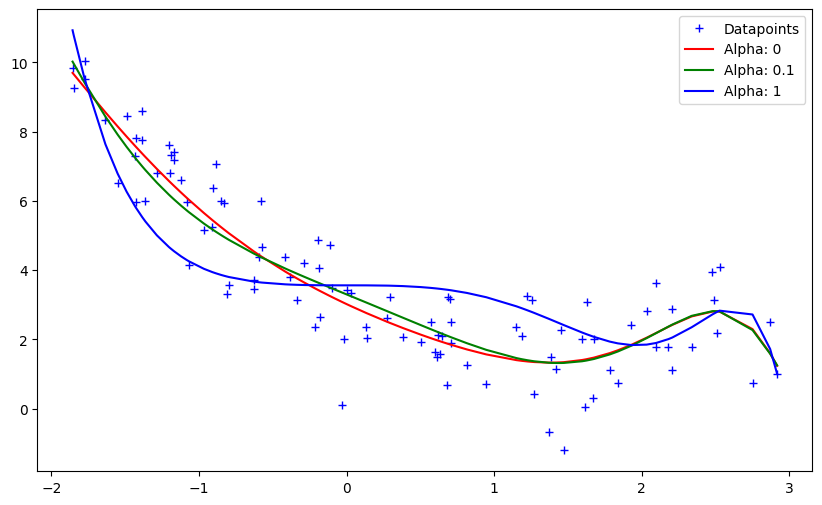

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()